In [1]:
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
manga = load_dataset('manga.py', trust_remote_code=True, split='train', streaming=True)
manga = iter(manga.with_format('numpy'))

In [3]:
ii = next(manga)

In [4]:
ii

{'object_id': '8485-12701',
 'ra': array(233.31922),
 'dec': array(48.119651),
 'healpix': array(9961),
 'z': array(0.0234253),
 'spaxel_size': array(0.5),
 'spaxel_size_units': 'arcsec',
 'spaxels': array([{'flux': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'ivar': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'mask': array([1024., 1024., 1024., ..., 1024., 1024., 1024.], dtype=float32), 'lsf': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'lambda': array([ 3621.596 ,  3622.43  ,  3623.2642, ..., 10349.038 , 10351.422 ,
               10353.806 ], dtype=float32), 'x': array(0), 'y': array(0), 'spaxel_idx': array(0), 'flux_units': "b'1E-17 erg/s/cm^2/Angstrom/spaxel'", 'lambda_units': "b'Angstrom'", 'skycoo_x': array(0.), 'skycoo_y': array(0.), 'ellcoo_r': array(0.), 'ellcoo_rre': array(0.), 'ellcoo_rkpc': array(0.), 'ellcoo_theta': array(0.), 'skycoo_units': "b'arcsec'", 'ellcoo_r_units': "b'arcsec'", 'ellcoo_rre_units': "b''", 'ellcoo_rkpc_units': "b'kpc/h'", 

Text(0.5, 1.0, 'Reconstructed r-bad PSF')

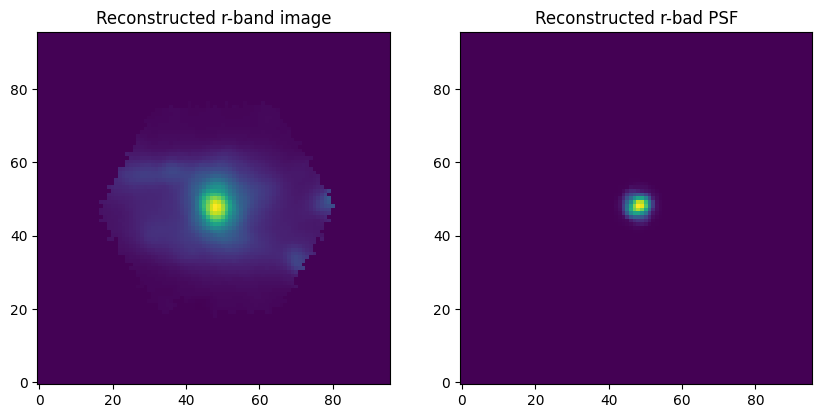

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plot r-band image
axs[0].imshow(ii['images'][1]['array'], origin='lower')
axs[0].set_title('Reconstructed r-band image')

# plot r-band psf
axs[1].imshow(ii['images'][1]['psf'], origin='lower')
axs[1].set_title('Reconstructed r-bad PSF')


Text(0.5, 1.0, 'Spaxel at Central Position')

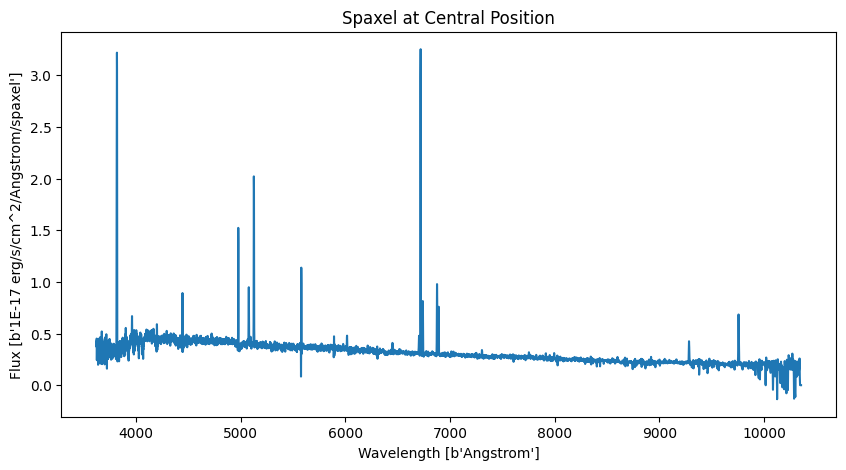

In [6]:
# get the central spaxel by x, y array element index
idx = 48 * 96 + 48
spax = ii['spaxels'][idx]

# plot
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(spax['lambda'], spax['flux'])
ax.set_xlabel(f'Wavelength [{spax["lambda_units"]}]')
ax.set_ylabel(f'Flux [{spax["flux_units"]}]')
ax.set_title('Spaxel at Central Position')

Text(0.5, 1.0, 'Spaxel at Central Position')

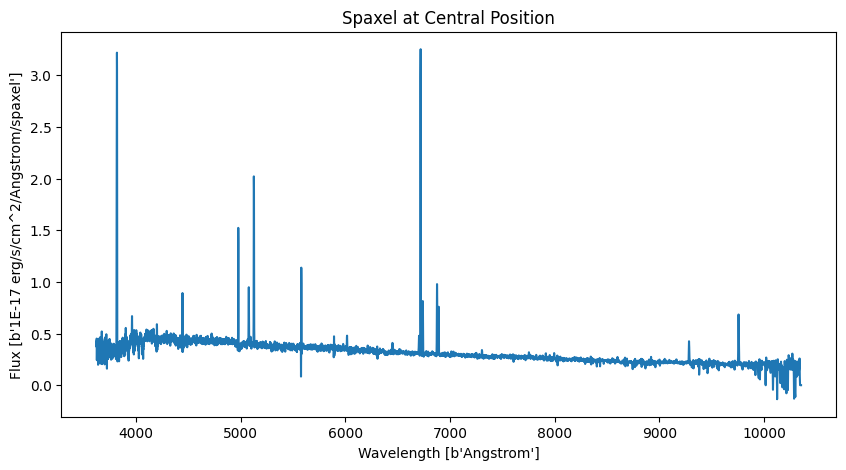

In [7]:
# get the central spaxel by the elliptical coordinate r in arcsec
rcoord = np.array([i["ellcoo_r"].tolist() for i in ii['spaxels']])
# exclude the padded spaxels
mask = rcoord != 0.0  
center_idx = np.where(mask)[0][np.argmin(rcoord[mask])]

spax = ii['spaxels'][center_idx]

# plot
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(spax['lambda'], spax['flux'])
ax.set_xlabel(f'Wavelength [{spax["lambda_units"]}]')
ax.set_ylabel(f'Flux [{spax["flux_units"]}]')
ax.set_title('Spaxel at Central Position')

In [8]:
def get_a_map(name: str, ii: dict):
    res = [i for i in ii['maps'] if ast.literal_eval(i['label']).decode()==name.lower()]
    if res:
        return res[0]

In [9]:
maps = ii['maps']
stellvel = get_a_map('stellar_vel', ii)
emhalpha = get_a_map('emline_gflux_ha_6564', ii)
d4000 = get_a_map('specindex_d4000', ii)

Text(0.5, 1.0, 'D4000')

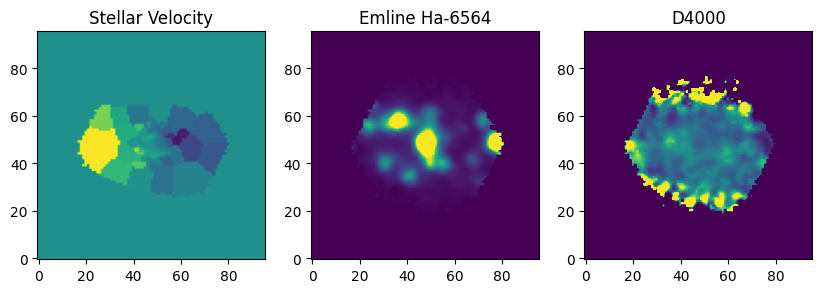

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# plot stellar velocity map
axs[0].imshow(stellvel['array'], origin='lower', vmin=-70, vmax=70)
axs[0].set_title('Stellar Velocity')

# plot H-alpha emission-line gaussian flux map
axs[1].imshow(emhalpha['array'], origin='lower', vmin=0, vmax=5)
axs[1].set_title('Emline Ha-6564')

# plot d4000 spectral index map
axs[2].imshow(d4000['array'], origin='lower', vmin=1, vmax=2)
axs[2].set_title('D4000')
